# El modelo SIS

Analizaremos uno de los casos más generales del modelo SIS, el modelo en el que se consideran las muertas causadas por la enfermedad junto con la natalidad y mortalidad de la población. En este modelo se consideran 2 posibles estados, susceptibles (S) e infectados (I).

Las variaciones entre estados vienen dadas por los nuevos contagios y los individuos que se recuperan de la enfermedad, adicionalmente cada estado se ve afectado por los parámetros que describen la natalidad/mortalidad y la muerte a cauda de la enfermedad. Los diferentes estados del modelo se pueden apreciar en el siguiente diagrama:

![texto del enlace](Imagenes/SIS_compartimientos.PNG)

En nuestro caso consideraremos una población de tamaño constante y normalizado, por lo que $S + I = 1$ y en consecuencia $S' + I' = 0$.

Típicamente cuando se habla de modelos epidemiológicos con muerte por enfermedad se consideran 4 parámetros: la tasa de infección $\beta$ que representa la probabilidad que tiene un individuo susceptible de adquirir la enfermedad luego de un contagio con un infectado, la tasa de recuperación $\alpha$ que se puede entender como la probabilidad de que un infectado se recupere de la enfermedad, la tasa de natalidad/mortalidad $\mu$ que en el caso de los modelos clásicos se considera igual y finalmente la tasa de muerte por enfermedad $\theta$.

Podemos describir el modelo a partir de un sistema de ecuaciones diferenciales como sigue:

\begin{equation}
\left\{
\begin{array}{l}
S' = \mu(1 - S) + (1 - \theta)\alpha I - \beta S I \\
I' = \beta S I - (1 - \theta)\alpha I - \mu I
\end{array}
\right.
\end{equation}

A continuación determinaremos en que escenarios una enfermedad seria endémica, para esto debemos calcular el valor de $R_0$ correspondiente a nuestro sistema de ecuaicones diferenciales.

Podemos apreciar que los nuevos infectados vienen dados por el término $\beta S$, además como para determinar el valor de $R_0$ se debe suponer una población completamente susceptible tenemos que $b(t) = \beta$. Por otro lado, los flujos que determinan la salida del estado de infección de los individuos viene dado por los términos $-\alpha(1-\theta)I-\mu I$, con lo que si llamamos $I(t)$ a la cantidad de individuos infectados que permanecieron infectados desde el momento 0, tenemos

\begin{equation}
\frac{dI}{dt} = -\alpha(1-\theta)I-\mu I
\end{equation}

Donde al usar el método de separación de variables obtenemos

\begin{equation}
I(t) = I(0)e^{-(\alpha(1-\theta)+\mu)t}
\end{equation}

De ese modo podemos afirmar que la proporción de individuos que permanecen infectado hasta un tiempo $t$ viene dado por $e^{-(\alpha(1-\theta)+\mu)t}$, con lo cual $F(t)=e^{-(\alpha(1-\theta)+\mu)t}$.

Finalmente, para determinar el valor de $R_0$ debemos calcular:

\begin{align}
R_0 &= \lim_{T\to\infty}\int_0^T b(t)F(t) dt \\
&= \lim_{T\to\infty}\int_0^T \beta e^{-(\alpha(1-\theta)+\mu)t} dt\\
&= \frac{\beta}{\alpha(1-\theta)+\mu}
\end{align}

$\textbf{Observación:}$ La ecuación $I(t)$ nos permite afirmar que la cantidad de individuos infectados tiende a cero cuando $t$ tiende a infinito.

Analicemos ahora la estabilidad de nuestro modelo SIS, para esto debemos reconocer los puntos en de equilibrio de nuestro sistema de ecuaciones diferenciales. Los puntos están dados por $P_0=(S_a,I_a)=(1,0)$ y uno en $P_1=(S_b,I_b)=\left(\frac{\alpha(1-\theta)+\mu}{\beta},\frac{\beta-\alpha(1-\theta)-\mu}{\beta}\right)$.

A continuación verificaremos que los puntos críticos efectivamente satisfacen las condiciones de ser positivos y menores o iguales a 1:

En el caso de $P_0$ la verificación es trivial. Por otro lado para el caso de $P_1$ observe que 

$$0\leq\alpha(1-\theta)+\mu\leq\beta \longrightarrow \frac{\alpha(1-\theta)+\mu}{\beta}\text{, }\frac{\beta+\alpha(1-\theta)+\mu}{\beta}\geq0$$

Si dividimos la expresión del lado izquierdo por $\beta$ obtenemos

$$0\leq \frac{\alpha(1-\theta)+\mu}{\beta}\leq1$$

De donde podemos afirmar que 

$$1-\frac{\alpha(1-\theta)+\mu}{\beta}\leq1 \longrightarrow \frac{\beta-\alpha(1-\theta)-\mu}{\beta}\leq1$$

De ese modo concluimos que ambos puntos de equilibrio cumplen las condiciones de tener coordenadas positivas y menores que la unidad.

Es momento de determinar los comportamientos que describen ambos puntos, $P_0$ y $P_1$. Para esto consideremos el jacobiano de nuestro modelo dado por:

$$|A-\lambda I|=
\left|\begin{array}{cc}
-\mu-\beta I-\lambda & \lambda(1-\theta)-\beta S \\
\beta I & \beta S-\alpha(1-\theta)-\mu-\lambda
\end{array}\right|$$

Si evaluamos en $P_0$ obtendremos los valores propios

$$\left\{\begin{array}{l}\lambda=-\mu \\
\lambda=\beta-\alpha(1-\theta)-\mu\end{array}\right.$$

Con lo cual, podemos afirmar que si $R_0>1$, $P_0$ se comportará como un punto de silla y por otro lado, si $R_0<1$ estaremos ante un nodo estable. Para el caso de $P_1$ tendremos un comportamiento tipo sumidero dado que $\lambda=0,\lambda=-\mu$ son los valores propios asociados a $P_1$.

## Estudio numérico

Para representar las soluciones del sistema de ecuaciones diferenciales que describe el modelo SIS usaremos el método de Euler, el cual se implementó en el modulo: ´´CompartmentalModelsInEDOS´´.

De manera general, dadas unas condiciones iniciales $S(0)=S_0,I(0)=I_0$ aplicamos el método de Euler a partir de la siguiente expresión

$$\left\{\begin{array}{l}
S_{t+1} = S_t + h\cdot(\mu(1 - S_t) + (1 - \theta)\alpha I_t - \beta S_t I_t ) \\
I_{t+1} = I_t + h\cdot(\beta S_t I_t - (1 - \theta)\alpha I_t - \mu I_t)
\end{array}\right.$$

Discretizaremos el tiempo en días tomando como escala $1\text{ día}=0.1$, es decir, $h=0.1$.

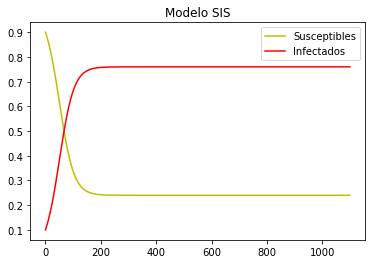

In [1]:
from EpidemiologicalModels.CompartmentalModelsInEDOS import *

# Parámetros del modelo:

alpha =  0.2 # Tasa de recuperación (días que dura en promedio la enfermedad)
mu = 1/(75*365) # Tasa de natalidad / mortalidad
theta = 0.4 # 0.1 # Tasa de muerte por enfermedad
# beta = -alpha*(1-theta)-mu # Tasa de contagio
beta = 0.5

# Funciones del modelo:

def S_function(values, beta = beta, mu = mu, theta = theta):
    S = values[0]; I = values[1]
    return mu*(1 - S) + (1 - theta)*alpha*I - beta*S*I

def I_function(values, alpha = alpha, beta = beta, mu = mu, theta = theta):
    S = values[0]; I = values[1]
    return beta*S*I - (1 - theta)*alpha*I - mu*I

listOfFunctions = [S_function, I_function]

# Condiciones iniciales:

initialValues = [0.9, 0.1]  # S_0 = 0.9; I_0 = 0.1

# Solución discreta del modelo

discreteSolutions = CompartmentalModelsInEDOS(listOfFunctions, initialValues)
discreteSolutions.n_iterations(1100)
discreteSolutions.titlePlot = "Modelo SIS"
discreteSolutions.plotSolutions(["Susceptibles", "Infectados"],["y","r"])

# El modelo SIR

Al igual que en el caso del modelo SIS, nos centraremos en una de las versiones mas generales del modelo SIR en donde se mantenga constante el tamaño de la población.

Para este modelo se considera el estado de inmunidad frente a la enfermedad R. A diferencia del modelo SIS, en el modelo SIR no hay una interacción del estado I al estado S ya que se supone que los individuos que se recuperen de la enfermedad no podran volver a contraerla, por lo que pasaran al estado R. 

En el siguiente diagrama se puden apreciar las interaciones para los estados del modelo:

![texto del enlace](Imagenes/SIR_compartimientos.PNG)

De ese modo, el sistema de ecuaciones diferenciales que describe las interacciones entre estados viene dado por la siguiente ecuación:

\begin{equation}
\left\{
\begin{array}{l}
S' = \mu(1 - S) + \alpha\theta I - \beta S I \\
I' = \beta S I - \mu I - \theta\alpha I - (1 - \theta)\alpha I = \beta S I - \alpha I - \mu I \\
R' = \alpha I - \alpha\theta I - \mu R
\end{array}
\right.
\end{equation}

En este caso, la ecuación diferencial que describirá la cantidad de individuos infectados desde el momento 0 viene dada por:

$$\frac{dI}{dt}=-\mu I - \alpha I \longrightarrow I(t)=I(0)e^{-(\alpha+\mu)t}$$

Con lo que $F(t)=e^{-(\alpha+\mu)t}$. La función $b(t)$ estará definida de la misma manera que en el modelo SIS por su naturaleza. De ese modo 

\begin{align}
R_0 &= \int_0^\infty b(t)F(t) dt \\
&= \lim_{T\to\infty} \int_0^T b(t)F(t) dt \\
&= \frac{\beta}{\alpha+\mu}
\end{align}

$\textbf{Observación:}$ Para el modelo SIR la población de infectados tendera a cero cuando $t$ tienda a infinito, debido a la expresión __.

A continuación vamos a proceder de la misma manera que en el modelo SIS para analizar la estabilidad de nuestro modelo:

Para nuestro modelo SIR los puntos de equilibrio son:

$$\begin{array}{cc}
P_0=(S_a,I_a,R_a)=(1,0,0) & P_1=(S_b,I_b,R_b)=\left(\frac{\alpha+\mu}{\beta},\frac{\mu(\beta-\alpha-\mu)}{\beta(\mu+(1-\theta)\alpha)},\frac{(1-\theta)\alpha(\beta-\alpha-\mu)}{\beta(\mu+(1-\theta)\alpha)}\right)
\end{array}$$

Veamos que las coordenadas de ambos puntos cumplen las condiciones de ser positivos y menores o iguales que uno: en el caso de $P_0$ se cumple de manera trivial.

Dado que $\alpha,\beta,\theta$ y $\mu$ son valores positivos podemos afirmar que $S_b>0$, para $I_b$ y $R_b$ observe que 

$$\begin{array}{ccc}
\frac{\mu(\beta-\alpha-\mu)}{\beta(\mu+(1-\theta)\alpha)},\frac{(1-\theta)\alpha(\beta-\alpha-\mu)}{\beta(\mu+(1-\theta)\alpha)}>0 & \text{, si} & \beta-\alpha-\mu>0
\end{array}$$

De la ecuación anterior podemos afirmar que 

$$\beta-\alpha-\mu>0\longrightarrow1>\frac{\alpha+\mu}{\beta}$$

además, como ya sabemos que se trata de un valor positivo podemos deducir que 

\begin{align}
1&>1-\frac{\alpha+\mu}{\beta} \\
&= \frac{(\beta-\alpha-\mu)(\mu+(1-\theta)\alpha)}{\beta(\mu+(1-\theta)\alpha)}\\
&= \frac{\mu(\beta-\alpha-\mu)}{\beta(\mu+(1-\theta)\alpha)}+\frac{(1-\theta)\alpha(\beta-\alpha-\mu)}{\beta(\mu+(1-\theta)\alpha)}
\end{align}

Con lo cual,

$$\frac{\mu(\beta-\alpha-\mu)}{\beta(\mu+(1-\theta)\alpha)},\frac{(1-\theta)\alpha(\beta-\alpha-\mu)}{\beta(\mu+(1-\theta)\alpha)}<1$$

Hemos demostrado que ambos puntos de equilibrio cumplen con las condiciones de tener coordenadas positivas y menores a la unidad. Ahora analizaremos la estabilidad de nuestro modelo SIR, para esto usaremos nuevamente el jacobiano de nuestro sistema de ecuaciones diferenciales, esto es

$$|A-\lambda I|=(-\mu-\lambda)
\left|\begin{array}{cc}
-\beta I-\mu-\lambda & -\beta S+\theta\alpha\\
\beta I & \beta S-\alpha-\mu -\lambda
\end{array}\right|$$

Si evaluamos en el punto $P_1$, podemos identificar un comportamiento de tipo silla si $\beta-\alpha-\mu>0$, en caso contrario nos encontraremos ante un nodo estable.

Si tomamos ahora el punto $P_2$ y observamos los valores propios 

$$\left\{\begin{array}{l}
\lambda=-\mu\\
\lambda=-\frac{1}{2}\frac{\mu\beta-\mu\theta\alpha+\sqrt{(\mu\beta-\mu\theta\alpha)^2-4\mu(\beta-\alpha-\mu)(\alpha+\mu-\theta\alpha)^2}}{\alpha+\mu-\theta\alpha} \\
\lambda=-\frac{1}{2}\frac{\mu\beta-\mu\theta\alpha-\sqrt{(\mu\beta-\mu\theta\alpha)^2-4\mu(\beta-\alpha-\mu)(\alpha+\mu-\theta\alpha)^2}}{\alpha+\mu-\theta\alpha}
\end{array}\right.$$

Y de ese modo obtendremos dos tipos de comportamientos, una espiral estable si los valores propios son imaginarios y un nodo estable en el caso de que los valores propios sean reales.

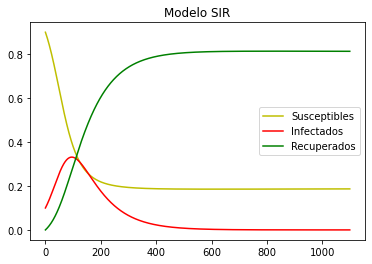

In [2]:
# Parámetros del modelo:

alpha =  0.2 # Tasa de recuperación (días que dura en promedio la enfermedad)
mu = 1/(75*365) # Tasa de natalidad / mortalidad
theta = 0.4 # 0.1 # Tasa de muerte por enfermedad
# beta = -alpha*(1-theta)-mu # Tasa de contagio
beta = 0.5

# Funciones del modelo:

def S_function(values, beta=beta, mu = mu, theta = theta):
    S = values[0]; I = values[1]
    return mu*(1 - S) - beta*S*I + alpha*theta*I

def I_function(values, alpha=alpha, beta=beta, mu = mu, theta = theta):
    S = values[0]; I = values[1]
    return beta*S*I - I*(alpha + mu)

def R_function(values, alpha=alpha, mu = mu, theta = theta):
    I = values[1]; R = values[2]
    return (1 - theta)*alpha*I - mu*R

listOfFunctions = [S_function, I_function, R_function]

# Condiciones iniciales:

initialValues = [0.9, 0.1, 0] # S_0 = 0.9; I_0 = 0.1; R_0 = 0

# Solución discreta del modelo:

discreteSolutions = CompartmentalModelsInEDOS(listOfFunctions, initialValues)
discreteSolutions.n_iterations(1100)
discreteSolutions.titlePlot = "Modelo SIR"
discreteSolutions.plotSolutions(["Susceptibles", "Infectados", "Recuperados"],["y", "r", "g"])

Referencias: 
1. http://www.mat.ucm.es/~ivorra/papers/Diego-Epidemiologia.pdf
2. Fred Brauer and Carlos Castillo-Chavez.Mathematical  Models  in  Population  Biologyand Epidemiology.  Springer, second edition